# Univariate Analysis

- Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, only one variable is analyzed. It doesn't deal with relationships and it's major purpose is to describe, it takes data, summarizes that data and finds patterns in the data.

In [4]:
#importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
#Load the dataset into a dataframe(file containing data)

df=pd.read_excel('current.xlsx',index_col=0)

In [6]:
df.shape

(25715, 7)

In [10]:
df.head()

,title,location,price(L),rate_persqft,area_insqft,building_status,agent_rating
0,Residential Plot,Maheshwaram,45.00,1111,4050,New,4.6
1,Residential Plot,Kondakal,34.00,2361,1440,New,3.7
2,Residential Plot,Bibinagar,14.19,944,1503,New,4.9
3,Residential Plot,Gachibowli,330.00,3333,9900,New,0.0
4,Residential Plot,Shadnagar,6.72,466,1440,New,4.7


In [11]:
# Returns the maximum and minimum values from a particular column.

def values(x):
    max_=df[x].idxmax()
    max_details=pd.DataFrame(df.loc[max_])
    
    min_=df[x].idxmin()
    min_details=pd.DataFrame(df.loc[min_])
    
    both=pd.concat([max_details,min_details],axis=1)
    
    return both

- we consider our target variable as price.

In [12]:
values("price(L)")

,10937,14320
title,4 BHK Independent House,Residential Plot
location,Banjara Hills,Nagole Bandlaguda Road
price(L),7000,0.16
rate_persqft,172541,106
area_insqft,4058,150
building_status,Ready to move,New
agent_rating,3.6,2


### observations:
- Among the prices in tha dataset max price is 7000 L i.e, **70Cr** and min price is **0.16 L** i.e, 16K.

#### "Thus from above observations of price we consider a price range of 16k to 1cr breaking it into several intervals as follows."
- Interval 1 =  [0.16 to 10 L]                              
- Interval 2 =  [10 to 20 L]                                
- Interval 3 =  [20 to 30 L]                                
- Interval 4 =  [30 to 40 L]                                
- Interval 5 =  [40 to 50 L]                                
- Interval 6 =  [50 to 60 L]
- Interval 7 =  [60 to 70 L]
- Interval 8 =  [70 to 80 L]
- Interval 9 =  [80 to 90 L]
- Interval 10 = [90 to 100 L]
- Interval 11 = [100 to 7000 L]

# 1st Interval  [0.16 to 10L]

In [27]:
d=df[(df['price(L)']>=0.16)&(df['price(L)']<=10.00)]
d.shape

(2128, 7)

### Observations:
- for the considered interval there are only 2128 datapoints i.e, 2128 properties.

# 1.1 Title

In [17]:
# Returns count of title's in dataset.

d1=d['title'].value_counts()
d1

Residential Plot    2121
3 BHK Apartment        3
1 BHK Apartment        2
2 BHK Apartment        1
3 BHK Villa            1
Name: title, dtype: int64

Text(0.5, 1.0, 'Type of properties')

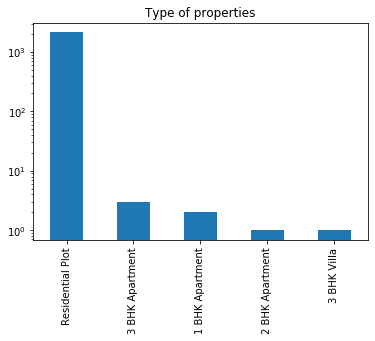

In [29]:
d1.plot.bar() # Plotting bar graph
plt.yscale('log') 
# we use log function so that least values can also be clearly visible.
#(when log is not used values such as 3,2,1,1 are barely visible in graph as highest count is 2121)
plt.title("Type of properties") 

### Observations:
- There are almost 2000 Residentail plots, 3 3BHK apartments, 1 2BHK apartments, 2 1BHK apartments, 1 3BHK Villa.

# 1.2 Location

In [40]:
# Returns count of location's in dataset.

d2=d['location'].value_counts()
d2

Shadnagar                         674
Yadagirigutta                     300
Warangal Highway Aler             107
Sadasivpet                        106
Kadthal                            77
Kothur                             71
Rudraram                           44
Shamshabad                         41
Sangareddy                         37
Bhuvanagiri                        36
Amangal                            28
Mamidpalli                         27
Maheshwaram                        27
Bangalore Hyderabad Highway        25
Sanga Reddy                        21
Vikarabad                          17
Jadcherla                          16
Alwal                              16
Srisailam Highway                  15
Nedunur                            15
Tandhur                            13
Patancheru                         13
Bhongir                            12
Timmapur                           12
Chevella                           12
Tukkuguda                          12
Ibrahimpatna

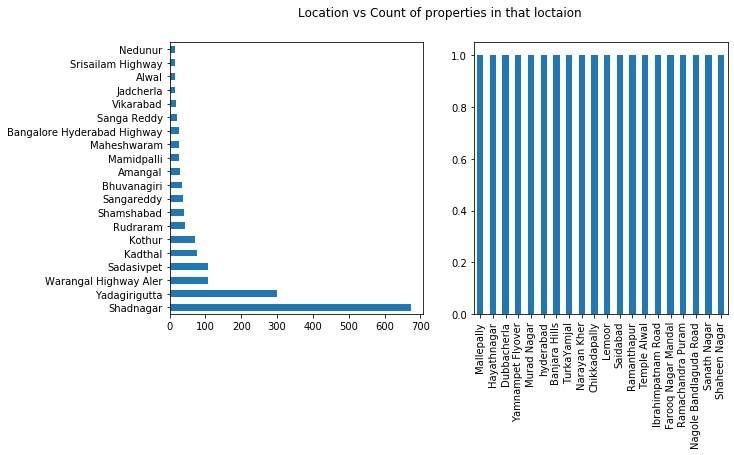

In [93]:
f,ax=plt.subplots(1,2,figsize=(10,5)) # Defining plot size and subplots.
f.suptitle("Location vs Count of properties in that loctaion") # Title for the plot.
d2.head(20).plot('barh',ax=ax[0]) # Plot for top 20 values.

d2.tail(20).plot('bar',ax=ax[1]) # Plot for least 20 values.

In [57]:
#returns total number for locations whose count is 1.

len((d['location'].value_counts())==1)

168

### Observations:
- Highest number of properties in the considered price interval comes from shadnagar i.e,around 690 and next yadagirigutta i.e,   300 and follows.
- There 168 locations which has only one property.

# 1.3 Price (L)

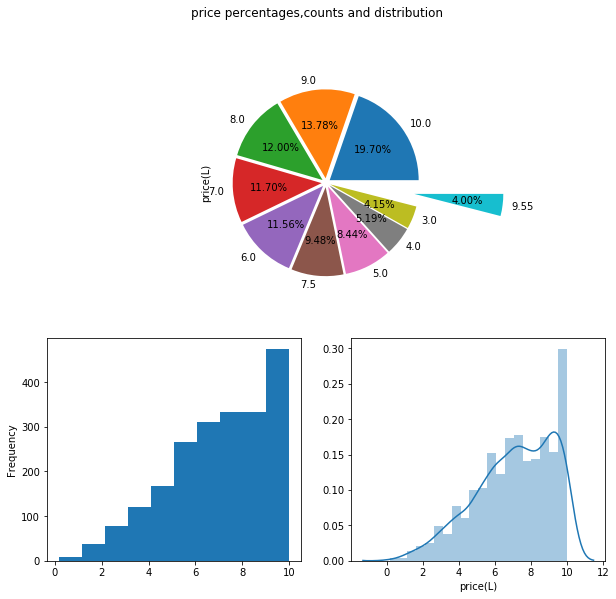

In [118]:
f,ax=plt.subplots(figsize=(10,9)) # Plot size
ax1=plt.subplot(211) 
f.suptitle("price percentages,counts and distribution") # Plot title
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,1) # Distance between each sub-pie.
d['price(L)'].value_counts(ascending=False).head(10).plot('pie',autopct="%0.2f%%",explode=explode,ax=ax1)
# Pie plot for top 10 values of price.

ax2=plt.subplot(223)
d['price(L)'].plot.hist() # Histogram for all prices.
ax2.plot

ax3=plt.subplot(224)
sns.distplot(d['price(L)'],ax=ax3) # Distribution plot for all prices.

### Observations:
- Approximately 19.7% of properties in the price range 0.16 to 1 L have price as 10 L.
- 13.78% of properties have price as 9.0 L.
- 4.00% of properties have price as 9.55 L.
- Number of properties having price (8-10L) are more Compared to (0.16 to 4 L).

# 1.4 Rate_persqft & Area_insqft

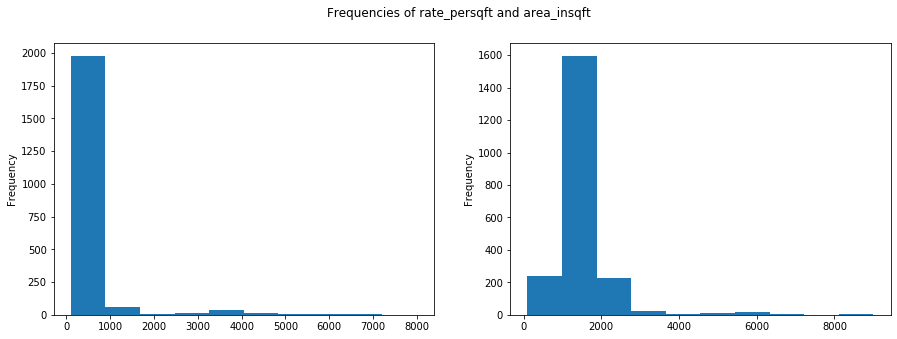

In [97]:
f,ax=plt.subplots(1,2,figsize=(15,5))
f.suptitle("Frequencies of rate_persqft and area_insqft") # Plot title
d['rate_persqft'].plot('hist',ax=ax[0]) # Histogram for rate_persqft.

d['area_insqft'].plot('hist',ax=ax[1]) # Histogram for area_insqft.

### Observations:
- 1900 properties in 0.16 to 10L range have rate_persqft price between 100 to 900.
- Area of properties are mostly around 1000 to 1900 i.e,almost 1580 properties

# 1.5 Building status

In [101]:
# Returns count of status of properties in dataset.

d['building_status'].value_counts()

New                   1874
Resale                 247
Ready to move            4
Under Construction       3
Name: building_status, dtype: int64

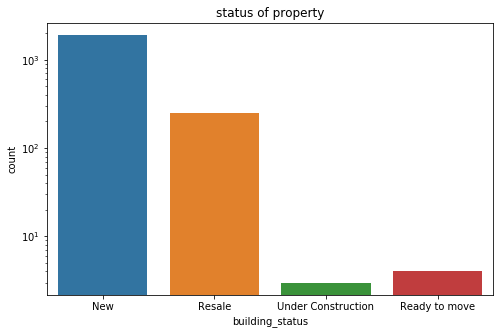

In [166]:
fig,ax=plt.subplots(figsize=(8,5))
sns.countplot(d['building_status'],ax=ax) # Count plot
plt.title("status of property") # Plot title
plt.yscale('log')
#(log is used such that even small values such as 3,4,6,1 are also visible)

### Observations:
- Compared to others New properties are more in 0.16 to 10 L price range.
- under construction to be lowest less than 100 and new to be between 1500 and 2000.

# 1.6 Agent_rating

Text(0.5, 1.0, 'Count of ratings')

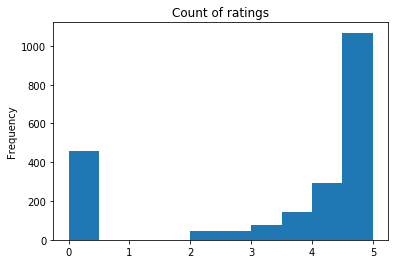

In [345]:
d['agent_rating'].plot('hist') # Histogram plot
plt.title("Count of ratings") # title for plot

### Observations:
- There are almost 1050 agents who has 4.5 to 5.0 ratings and least number of agents have ratings between 2 and 3.
- 450-500 agents have their ratings between 0 and 0.5

# 2nd Interval  [10 to 20L]

In [30]:
b=df[(df['price(L)']>10.00)&(df['price(L)']<=20.00)]
b.shape

(4354, 7)

### Observations:
- for the considered interval there are 4354 datapoints i.e, 4354 properties.

In [10]:
# Here we defined function for plotting title.
# All you need to do is to just pass the dataset you want to plot.

def title(x):
    x.plot.bar() # x is the dataframe.
    plt.yscale('log')
    plt.title("Type of properties")

In [154]:
# Function for plotting locations.

def location(x):
    f,ax=plt.subplots(1,2,figsize=(10,5))
    f.suptitle("Location vs Count of properties in that loctaion")
    x.head(20).plot('barh',ax=ax[0])  # x is the dataframe.

    x.tail(20).plot('bar',ax=ax[1]) # x is the dataframe. 

In [150]:
#function for plotting prices.

def price(x):
    f,ax=plt.subplots(figsize=(10,9))
    ax1=plt.subplot(211)
    f.suptitle("price percentages,counts and distribution")
    explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,1)
    x['price(L)'].value_counts(ascending=False).head(10).plot('pie',autopct="%0.2f%%",explode=explode,ax=ax1)
    # x is the dataframe.
    
    ax2=plt.subplot(223)
    x['price(L)'].plot.hist()  # x is the dataframe.
    ax2.plot

    ax3=plt.subplot(224)
    sns.distplot(x['price(L)'],ax=ax3)  # x is the dataframe.

In [42]:
# Function for plotting area_insqft and rate_persqft.

def area_rate(x):
    f,ax=plt.subplots(1,2,figsize=(15,5))
    f.suptitle("Frequencies of rate_persqft and area_insqft")
    x['rate_persqft'].plot('hist',ax=ax[0])  # x is the dataframe.

    x['area_insqft'].plot('hist',ax=ax[1])   # x is the dataframe.

In [33]:
# Function for plotting building status

def b_status(x):
    fig,ax=plt.subplots(figsize=(8,5))
    sns.countplot(x['building_status'],ax=ax)  # x is the dataframe.
    plt.title("status of property")
    plt.yscale('log')

In [13]:
# Fuction for plotting agent ratings

def rating(m):
    m['agent_rating'].plot('hist')  # m is the dataframe.
    plt.title("Count of ratings")

# 2.1 Title

In [128]:
b1=b['title'].value_counts()
b1

Residential Plot           4161
2 BHK Apartment              91
1 BHK Apartment              56
1 BHK Independent House      19
3 BHK Apartment               8
2 BHK Independent House       8
4 BHK Independent House       4
4 BHK Apartment               2
1 BHK Independent Floor       2
2 BHK Independent Floor       2
3 BHK Independent House       1
Name: title, dtype: int64

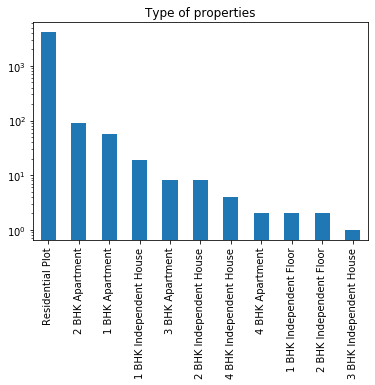

In [158]:
title(b1)

### Observations:
- There are almost 4000 Residentail plots, 90 2BHK apartments, 19 1BHK independent houses, 2 4BHK apartments, 50 1BHK Apartment.

# 2.2 Location

In [130]:
b2=b['location'].value_counts()
b2

Shadnagar                      604
Kothur                         341
Kadthal                        316
Maheshwaram                    293
Yadagirigutta                  186
Mansanpally Highway            110
Sadasivpet                     109
Bibinagar                       95
Tukkuguda                       89
Warangal Highway Aler           83
Adibatla                        79
Dubbacherla                     78
Shamirpet                       76
Patancheru                      74
Shamshabad                      69
Srisailam Highway               68
Ghatkesar                       65
Rudraram                        63
Bhuvanagiri                     57
Mansanpally                     55
Thummaluru                      53
Mucherla                        48
Kandukur                        42
Indresham                       41
Bhongir                         40
Ibrahimpatnam                   37
Dubbacharla                     37
Timmapur                        35
Sangareddy          

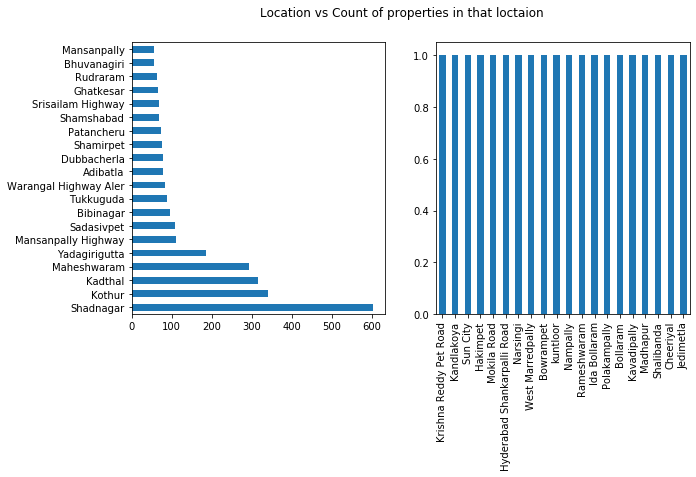

In [159]:
location(b2)

In [134]:
len((b['location'].value_counts())==1)

293

### Observations:
- Highest number of properties in the considered price interval comes from shadnagar i.e,600 and followed by kothur i.e,340 and follows.
- There 293 locations which has only one property.

# 2.3 Price (L)

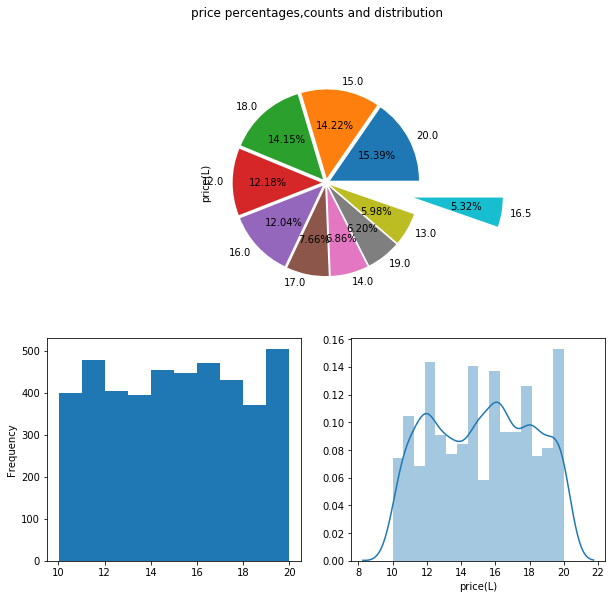

In [160]:
price(b)

### Observations:
- Approximately 15.39% of properties in the price range 10 to 20 L have price as 20 L.
- 14.22% of properties have price as 15 L.
- 5.98% of properties have price as 13 L.
- Number of properties having price (19-20L) are almost equal when Compared to (11 to 12 L).

# 2.4 Rate_persqft & Area_insqft

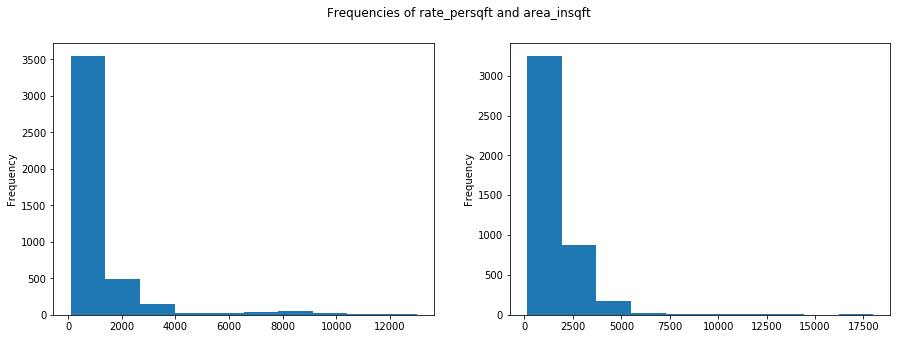

In [162]:
area_rate(b)

### Observations:
- 3500 properties in 10 to 20L range have rate_persqft price between 100 to 1100.
- Area of properties are mostly around 500 to 2400 i.e,almost 3300 properties

# 2.5 Building status

In [31]:
b['building_status'].value_counts()

New                   3830
Resale                 331
Under Construction     106
Ready to move           87
Name: building_status, dtype: int64

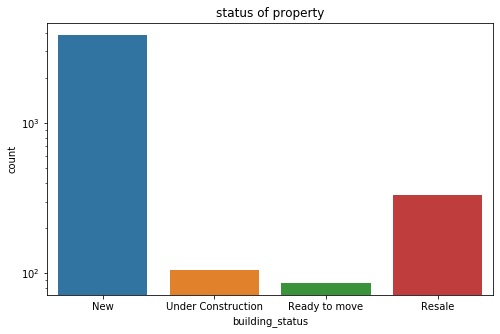

In [34]:
b_status(b)

### Observations:
- Compared to others New properties are more in 10 to 20 L price range.
- Ready to move to be lowest less than 100 and new to be highest.

# 2.6 Agent_rating

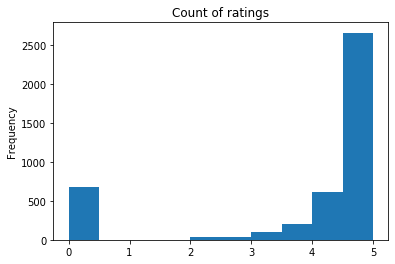

In [348]:
rating(b)

### Observations:
- There are almost 2600 agents who has 4.5 to 5.0 ratings and least number of agents have ratings between 2 and 3.
- 500-700 agents have their ratings between 0 and 0.5

# 3rd Interval  [20 to 30L]

In [37]:
c=df[(df['price(L)']>20.00)&(df['price(L)']<=30.00)]
c.shape

(4028, 7)

### Observations:
- for the considered interval there are only 4028 datapoints i.e, 4028 properties.

# 3.1 Title

In [358]:
c1=c['title'].value_counts()
c1

Residential Plot           3469
2 BHK Apartment             332
1 BHK Apartment              78
3 BHK Apartment              65
2 BHK Independent House      48
1 BHK Independent House      25
2 BHK Independent Floor       8
2 BHK Villa                   1
1 BHK Independent Floor       1
3 BHK Independent House       1
Name: title, dtype: int64

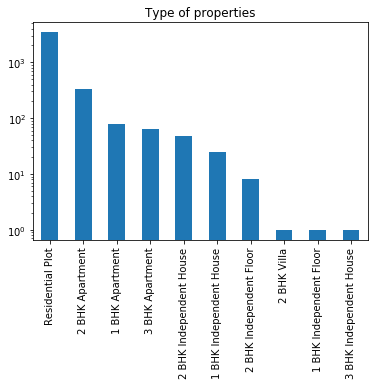

In [173]:
title(c1)

### Observations:
- There are aroud 3000 Residentail plots, 300 2BHK apartments, 8 2BHK independent floor, 80 1BHK apartments, 1 2BHK Villa.

# 3.2 Location

In [143]:
c2=c['location'].value_counts()
c2

Tukkuguda                         305
Maheshwaram                       303
Adibatla                          239
Kothur                            193
Kadthal                           143
Shadnagar                         113
Mansanpally Highway                98
Ghatkesar                          94
Bhuvanagiri                        84
Patancheru                         79
Srisailam Highway                  78
Isnapur                            74
Shamirpet                          71
Mansanpally                        65
Ibrahimpatnam                      65
Medchal                            65
Thummaluru                         55
Shamshabad                         52
Mucherla                           46
Timmapur                           44
Shankarpalli                       42
Rudraram                           41
Beeramguda                         40
Kandukur                           40
Bhongir                            40
Nandigama                          37
Sultanpur   

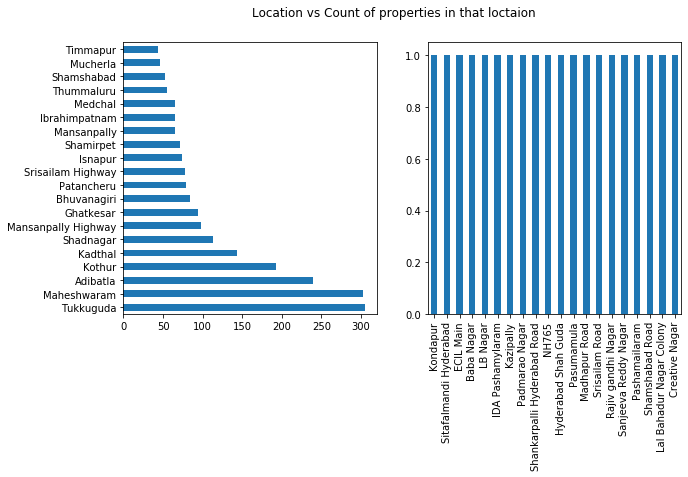

In [174]:
location(c2)

In [145]:
len((c['location'].value_counts())==1)

362

### Observations:
- Highest number of properties in the considered price interval comes from tukkuguda and maheshwaram i.e,around 300 and next adibatla i.e,240 and follows.
- There 362 locations which has only one property.

# 3.3 Price (L)

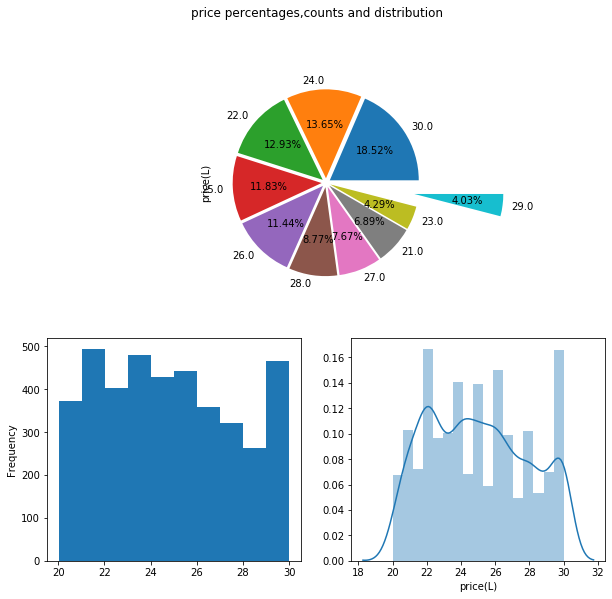

In [149]:
price(c)

### Observations:
- Approximately 18.52% of properties in the price range 20 to 30 L have price as 30 L.
- 13.65% of properties have price as 24.0 L.
- 6.89% of properties have price as 21.0 L.
- Number of properties having price (21-22L) are slightly high Compared to (29 to 30 L).

# 3.4 Rate_persqft & Area_insqft

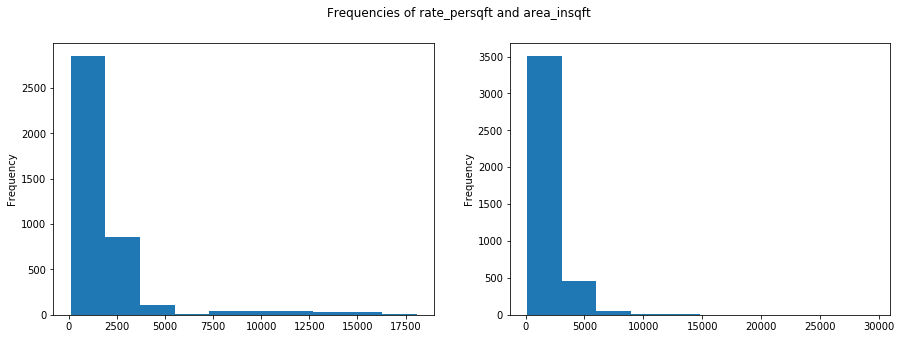

In [175]:
area_rate(c)

### Observations:
- 2800 properties in 20 to 30L range have rate_persqft price between 100 to 2000.
- Area of properties are mostly around 150 to 3500 i.e,almost 3400 properties

# 3.5 Building status

In [176]:
c['building_status'].value_counts()

New                   3168
Resale                 301
Under Construction     285
Ready to move          274
Name: building_status, dtype: int64

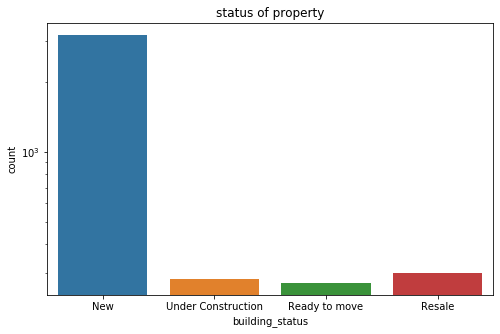

In [177]:
b_status(c)

### Observations:
- Compared to others New properties are more in 20 to 30 L price range.
- ready to move to be lowest less and new to be highest.

# 3.6 Agent_rating

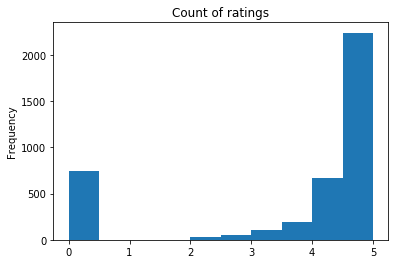

In [349]:
rating(c)

### Observations:
- There are almost 2250 agents who has 4.5 to 5.0 ratings and least number of agents have ratings between 2 and 3.
- 750 agents have their ratings between 0 and 0.5

# 4th Interval  [30 to 40L]

In [39]:
q=df[(df['price(L)']>30.00)&(df['price(L)']<=40.00)]
q.shape

(2755, 7)

### Observations:
- for the considered interval there are only 2755 datapoints i.e, 2755 properties.

# 4.1 Title

In [189]:
q1=q['title'].value_counts()
q1

Residential Plot           1903
2 BHK Apartment             573
3 BHK Apartment              78
2 BHK Independent House      72
1 BHK Apartment              68
1 BHK Independent House      22
1 BHK Independent Floor       9
3 BHK Independent House       8
2 BHK Independent Floor       6
1 RK Studio Apartment         5
4 BHK Independent House       3
4 BHK Apartment               2
4 BHK Independent Floor       1
2 BHK Penthouse               1
3 BHK Independent Floor       1
2 BHK Villa                   1
5 BHK Apartment               1
3 BHK Villa                   1
Name: title, dtype: int64

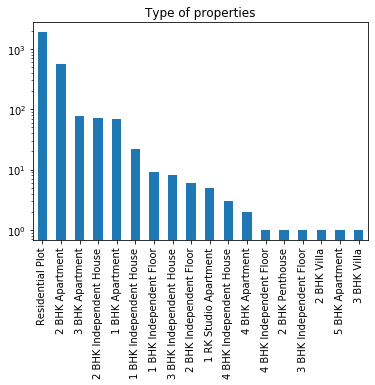

In [190]:
title(q1)

### Observations:
- There are 1900 Residentail plots, 70 3BHK apartments, 500 2BHK apartments, 9 1BHK independent floor, 1 5BHK Apartment.

# 4.2 Location

In [192]:
q2=q['location'].value_counts()
q2

Adibatla                                      163
Tukkuguda                                     155
Maheshwaram                                   113
Kadthal                                        78
Nandigama                                      65
Ghatkesar                                      62
Bhanur                                         57
Bachupally                                     55
Medchal                                        51
Bhuvanagiri                                    51
Patancheru                                     50
Kollur                                         46
Isnapur                                        46
Mangalpally                                    45
Shamshabad                                     40
Shankarpalli                                   39
Tellapur                                       36
Srisailam Highway                              34
Kothur                                         33
Miyapur                                        33


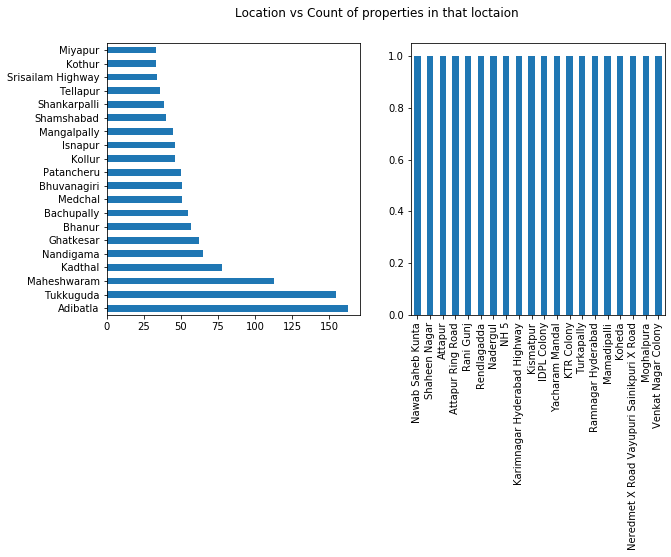

In [193]:
location(q2)

In [195]:
len((q['location'].value_counts())==1)

364

### Observations:
- Highest number of properties in the considered price interval comes from Adibatla i.e,around 160 and next tukkuguda i.e, 150 and follows.
- There 364 locations which has only one property.

# 4.3 Price (L)

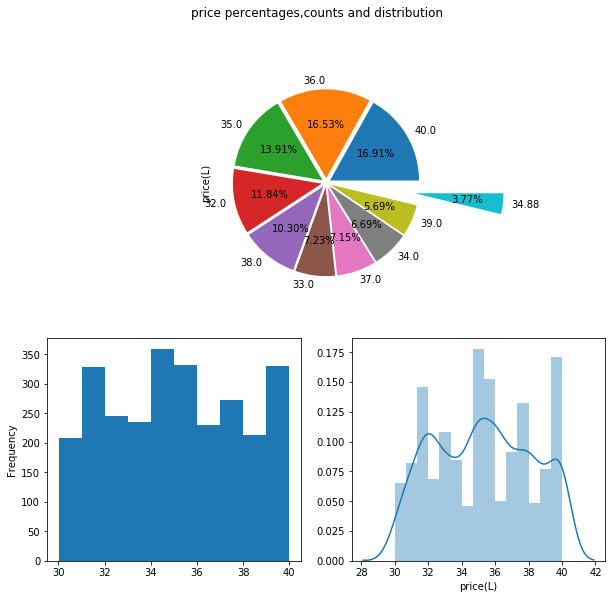

In [196]:
price(q)

### Observations:
- Approximately 16.91% of properties in the price range 30 to 40 L have price as 40 L.
- 10.30% of properties have price as 38.00 L.
- 3.77% of properties have price as 34.88 L.
- Number of properties having price (34-35L) are almost equal when Compared to (39 to 40 L).

# 4.4 Rate_persqft & Area_insqft

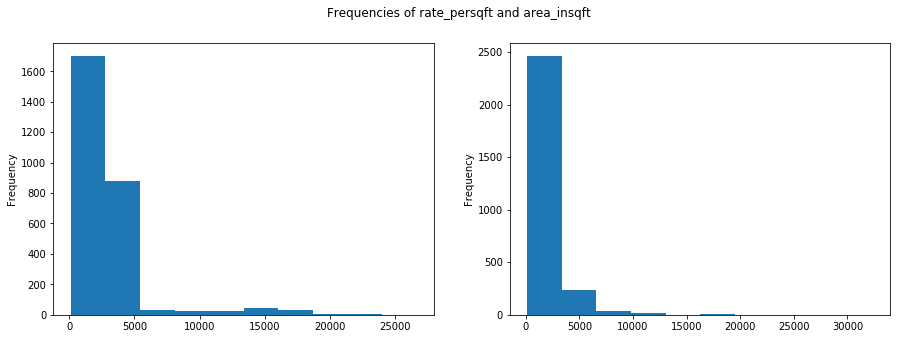

In [43]:
area_rate(q)

### Observations:
- 1700 properties in 30 to 40L range have rate_persqft price between 100 to 2500.
- Area of properties are mostly around 150 to 1600 i.e,almost 2400 properties

# 4.5 Building Status

In [198]:
q['building_status'].value_counts()

New                   1718
Ready to move          497
Under Construction     355
Resale                 185
Name: building_status, dtype: int64

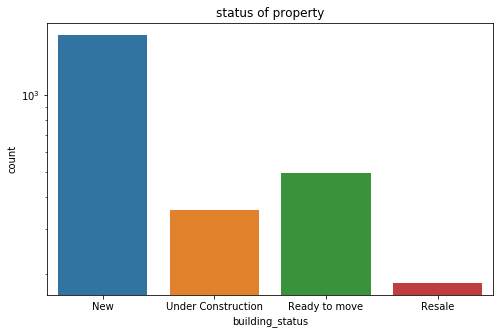

In [199]:
b_status(q)

### Observations:
- Compared to others New properties are more in 30 to 40 L price range.
- Resale to be lowest less than new to 500 New around 1500.

# 4.6 Agent_rating

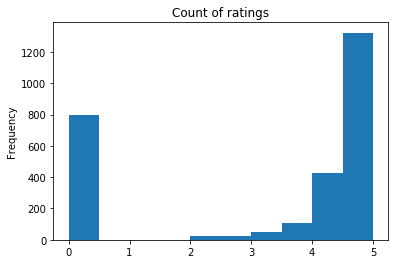

In [350]:
rating(q)

### Observations:
- There are almost 1400 agents who has 4.5 to 5.0 ratings and least number of agents have ratings between 2 and 3.
- 800 agents have their ratings between 0 and 0.5

# 5th Interval  [40 to 50L]

In [202]:
w=df[(df['price(L)']>40.00)&(df['price(L)']<=50.00)]
w.shape

(2190, 7)

### Observations:
- for the considered interval there are only 2190 datapoints i.e, 2190 properties.

# 5.1 Title

In [205]:
w1=w['title'].value_counts()
w1

Residential Plot           936
2 BHK Apartment            910
3 BHK Apartment            129
2 BHK Independent House     97
1 BHK Apartment             49
1 BHK Independent House     24
2 BHK Independent Floor     17
3 BHK Independent House     10
4 BHK Apartment              5
2 BHK Villa                  3
1 RK Studio Apartment        3
3 BHK Independent Floor      2
1 BHK Independent Floor      1
4 BHK Independent House      1
6 BHK Independent House      1
3 BHK Villa                  1
1 BHK Villa                  1
Name: title, dtype: int64

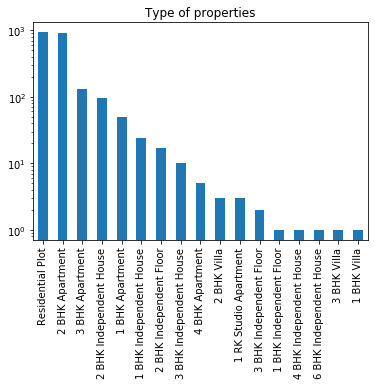

In [206]:
title(w1)

### Observations:
- There are around 900 Residentail plots, 890 2BHK apartments, 120 3BHK apartments, 40 1BHK apartments, 1 3BHK Villa.

# 5.2 Location

In [207]:
w2=w['location'].value_counts()
w2

Nizampet                       73
Kollur                         72
Miyapur                        69
Maheshwaram                    65
Kadthal                        64
Kollur Road                    62
Shamshabad                     59
Bachupally                     56
Tukkuguda                      52
Adibatla                       49
Bhanur                         48
Medchal                        46
Gajularamaram                  39
Pragathi Nagar Kukatpally      37
Nandigama                      36
Pragathi Nagar                 35
International Airport          34
Kompally                       32
Rampally                       32
Alwal                          32
Patancheru                     30
Velimela                       24
Kukatpally                     24
Manikonda                      22
Mokila                         21
Tarnaka                        20
Miyapur Bachupally Road        20
Nanakramguda                   19
Kothur                         19
Gagillapur    

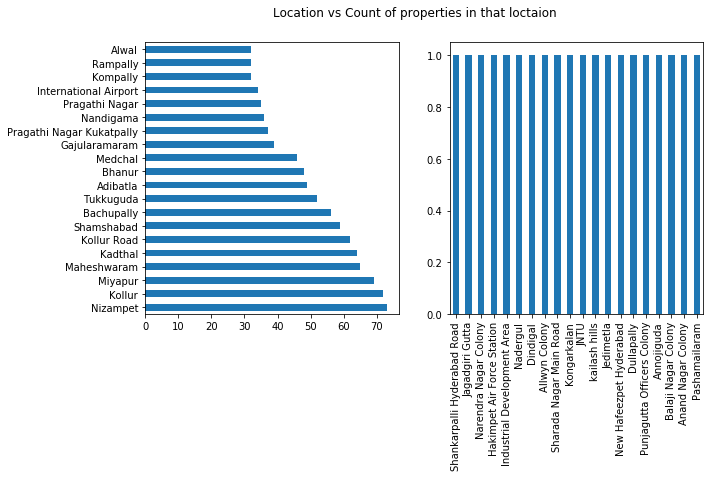

In [208]:
location(w2)

In [209]:
len((w['location'].value_counts())==1)

347

### Observations:
- Highest number of properties in the considered price interval comes from nizampet i.e,around 70 and next miyapur i.e,68 and follows.
- There 347 locations which has only one property.

# 5.3 Price (L)

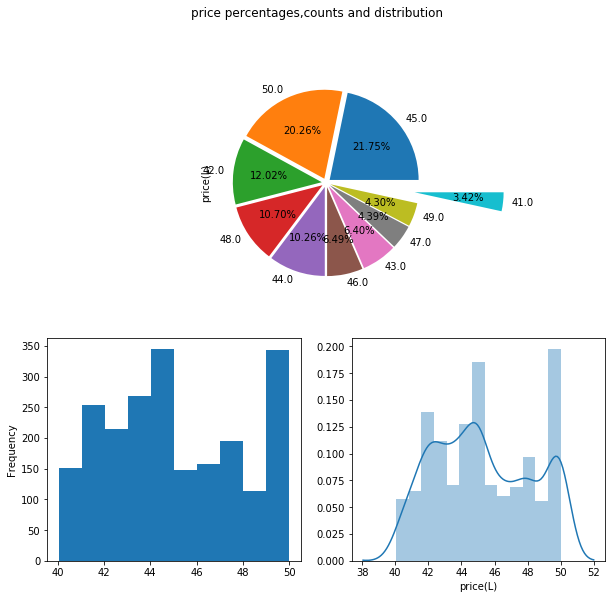

In [210]:
price(w)

### Observations:
- Approximately 21.75% of properties in the price range 40 to 50 L have price as 45 L.
- 20.26% of properties have price as 50.0 L.
- 3.42% of properties have price as 41 L.
- Number of properties having price (44-45L) and (49 to 50 L) are almost equal i.e, around 330

# 5.4 Rate_persqft & Area_insqft

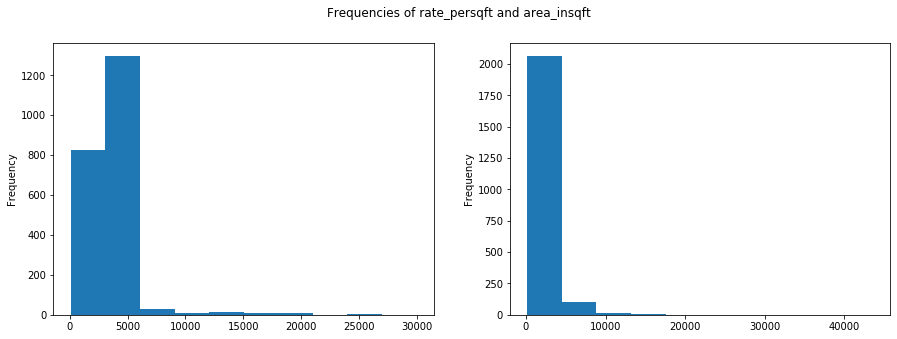

In [211]:
area_rate(w)

### Observations:
- 1100 properties in 40 to 50L range have rate_persqft price between 100 to 5000.
- Area of properties are mostly around 150 to 5000 i.e,almost 2000 properties

# 5.5 Building Status

In [212]:
w['building_status'].value_counts()

New                   795
Ready to move         722
Under Construction    532
Resale                141
Name: building_status, dtype: int64

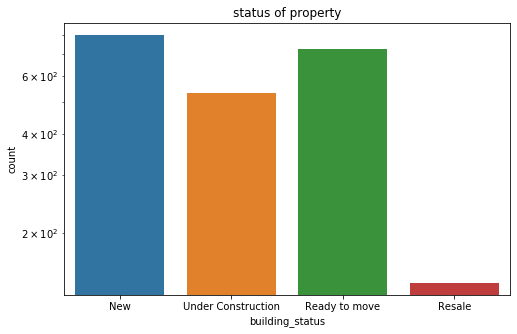

In [214]:
b_status(w)

### Observations:
- Compared to others New properties are more in 40 to 50 L price range.
- Resale to be lowest less than 150 and new to be between 600 and 800.

# 5.6 Agent_rating

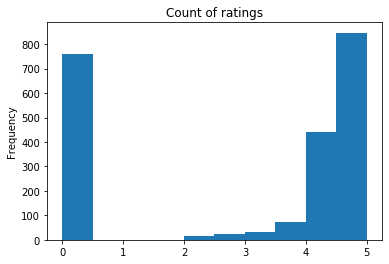

In [351]:
rating(w)

### Observations:
- There are almost 850 agents who has 4.5 to 5.0 ratings and least number of agents have ratings between 2 and 3.
- 750 agents have their ratings between 0 and 0.5

# 6th Interval  [50 to 60L]

In [225]:
r=df[(df['price(L)']>50.00)&(df['price(L)']<=60.00)]
r.shape

(1705, 7)

### Observations:
- for the considered interval there are only 1705 datapoints i.e, 1705 properties.

# 6.1 Title

In [226]:
r1=r['title'].value_counts()
r1

2 BHK Apartment            631
Residential Plot           441
3 BHK Apartment            266
2 BHK Independent House    257
1 BHK Independent House     24
1 BHK Apartment             21
2 BHK Independent Floor     18
3 BHK Villa                 17
3 BHK Independent House     10
4 BHK Villa                  9
4 BHK Independent House      5
1 BHK Villa                  1
1 RK Studio Apartment        1
4 BHK Independent Floor      1
1 BHK Independent Floor      1
4 BHK Apartment              1
3 BHK Independent Floor      1
Name: title, dtype: int64

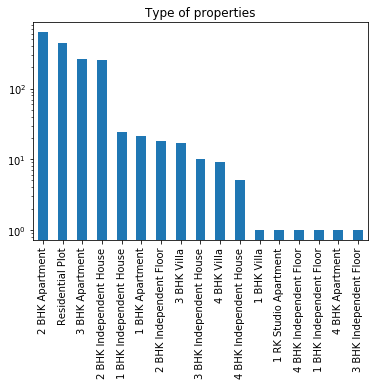

In [227]:
title(r1)

### Observations:
- There are around 600 2BHK apartments, 250 3BHK apartments, 15 3BHK villa, 1 1BHK villa, 1 3BHK Independent floor.

# 6.2 Location

In [228]:
r2=r['location'].value_counts()
r2

Beeramguda Road                     98
Miyapur                             68
Tellapur                            67
Kukatpally                          63
Beeramguda                          59
Manikonda                           52
Gachibowli                          47
Kollur                              37
Shamshabad                          33
Maheshwaram                         31
Gajularamaram                       30
Kollur Road                         28
Kadthal                             28
Rampally                            24
Nanakramguda                        24
Nizampet                            24
Nandigama                           22
International Airport               21
Narsingi                            19
Madinaguda                          19
Bachupally                          18
Dammaiguda                          17
Bandlaguda Jagir                    17
Kandlakoya                          17
Medchal                             16
Kondapur                 

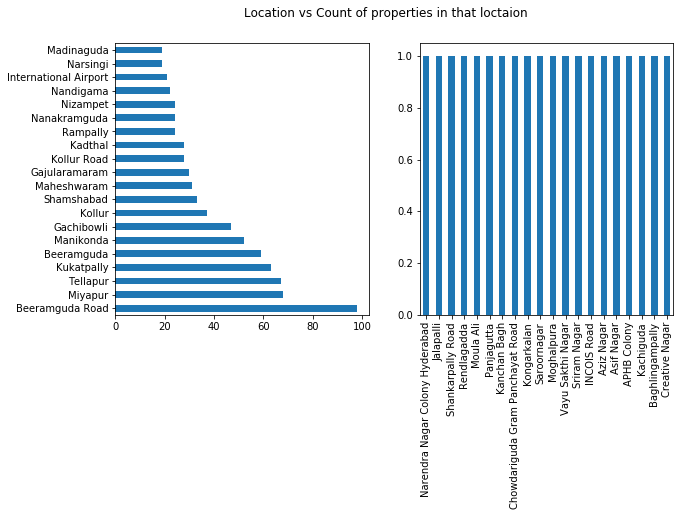

In [229]:
location(r2)

In [230]:
len((r['location'].value_counts())==1)

293

### Observations:
- Highest number of properties in the considered price interval comes from beeramguda road i.e,around 95 and next from miyapur i.e,65 and follows.
- There 293 locations which has only one property.

# 6.3 Price (L)

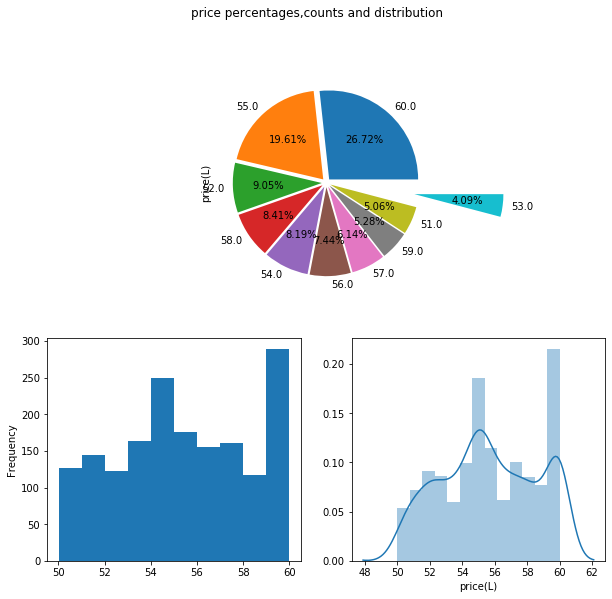

In [231]:
price(r)

### Observations:
- Approximately 26.72% of properties in this price range have price as 60 L.
- 19.61% of properties have price as 55 L.
- 4.09% of properties have price as 53 L.
- Number of properties having price (54-55L) are slightly lower when Compared to (59 to 60 L).

# 6.4 Rate_persqft & Area_insqft

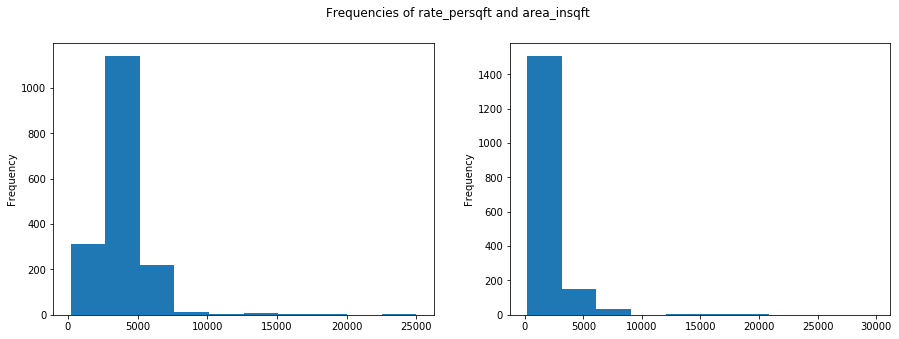

In [232]:
area_rate(r)

### Observations:
- 1100 properties in 50 to 60L range have rate_persqft price between 2500 to 50000.
- Area of properties are mostly around 150 to 4000 i.e,almost 1500 properties

# 6.5 Building status

In [233]:
r['building_status'].value_counts()

Ready to move         734
Under Construction    530
New                   369
Resale                 72
Name: building_status, dtype: int64

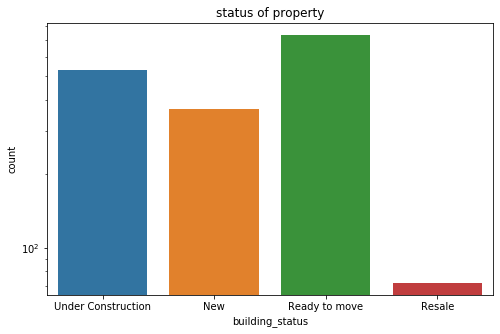

In [234]:
b_status(r)

### Observations:
- Compared to others Ready to move are more in 50 t0 60 L price range.
- resale to be lowest less than 100.

# 6.6 Agent_rating

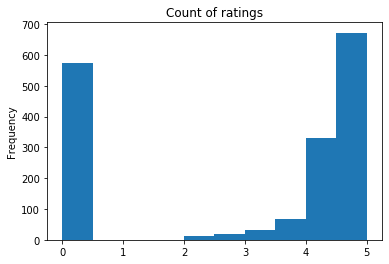

In [352]:
rating(r)

### Observations:
- There are almost 650 agents who has 4.5 to  5.0 ratings and least number of agents have ratings between 2 and 3.
- 550-560 agents have their ratings between 0 and 0.5

# 7th Interval  [60 to 70L]

In [237]:
t=df[(df['price(L)']>60.00)&(df['price(L)']<=70.00)]
t.shape

(1362, 7)

### Observations:
- for the considered interval there are only 1362 datapoints i.e, 1362 properties.

# 7.1 Title

In [238]:
t1=t['title'].value_counts()
t1

2 BHK Apartment            455
3 BHK Apartment            373
Residential Plot           293
2 BHK Independent House    129
1 BHK Independent House     23
3 BHK Independent House     21
1 BHK Apartment             20
3 BHK Villa                 11
2 BHK Independent Floor     10
4 BHK Independent House      9
3 BHK Independent Floor      6
2 BHK Villa                  4
4 BHK Villa                  4
4 BHK Apartment              2
5 BHK Independent House      1
1 BHK Villa                  1
Name: title, dtype: int64

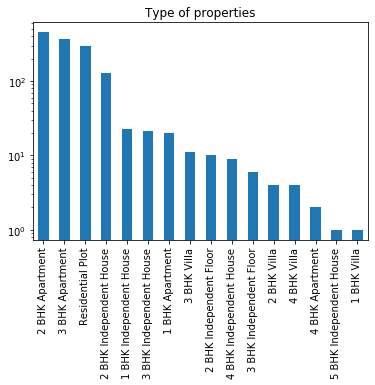

In [239]:
title(t1)

### Observations:
- There are around 250 Residentail plots, 300 3BHK apartments, 400 2BHK apartments, 20 1BHK apartments, 4 2BHK Villa.

# 7.2 Location

In [240]:
t2=t['location'].value_counts()
t2

Tellapur                      180
Miyapur                        67
Gachibowli                     58
Narsingi                       43
Madinaguda                     41
Manikonda                      37
Maheshwaram                    30
Beeramguda                     29
Medchal                        26
Shamshabad                     25
Kukatpally                     24
Nanakramguda                   23
Kadthal                        21
Dammaiguda                     20
Kondapur                       19
Mansanpally Highway            18
Nizampet                       17
Kokapet                        16
Mokila                         15
Bandlaguda Jagir               14
Tarnaka                        13
Kompally                       12
Nagaram                        11
Serilingampally                11
Beeramguda Road                11
Chandanagar                    11
ECIL Main Road                 10
Puppalaguda                     9
Miyapur Bachupally Road         9
Rampally      

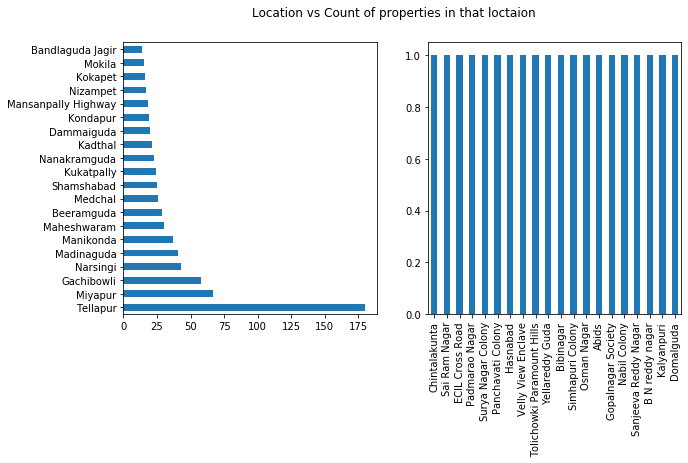

In [241]:
location(t2)

In [242]:
len((t['location'].value_counts())==1)

257

### Observations:
- Highest number of properties in the considered price interval comes from Tellapur i.e,around 175 and next miyapur i.e,60 and follows.
- There 257 locations which has only one property.

# 7.3 Price (L)

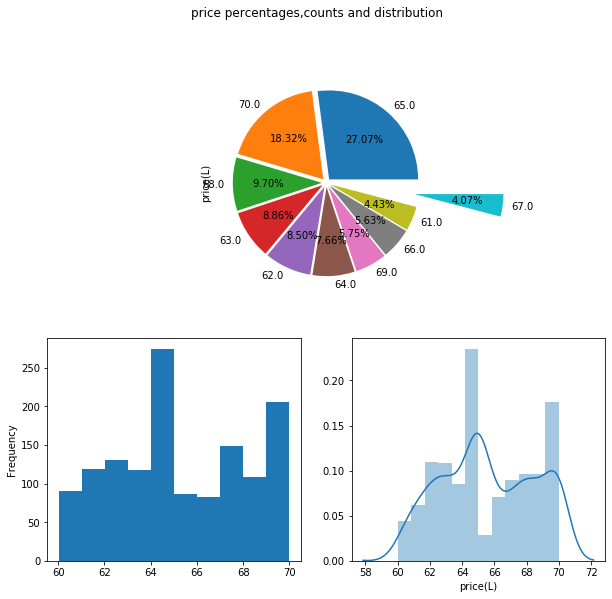

In [243]:
price(t)

### Observations:
- Approximately 27.7% of properties in the price have price as 65 L.
- 18.32% of properties have price as 70 L.
- 4.07% of properties have price as 67 L.
- Number of properties having price (64-65L) are more.

# 7.4 Rate_persqft & Area_insqft

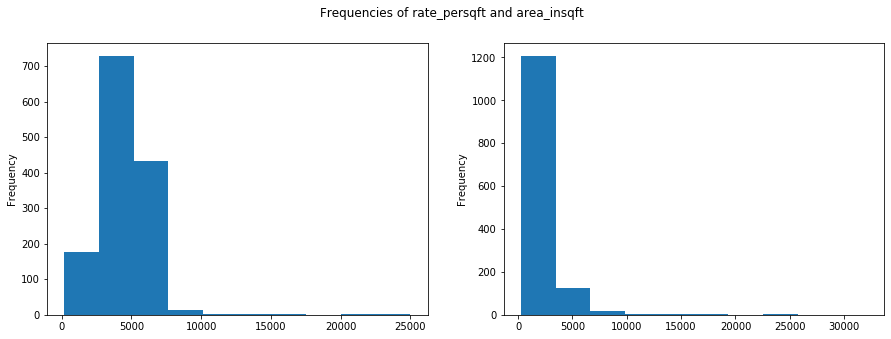

In [244]:
area_rate(t)

### Observations:
- 700 properties in this range have rate_persqft price between 2500 to 5000.
- Area of properties are mostly around 110 to 4000 i.e,almost 1200 properties

# 7.5 Building Status

In [247]:
t['building_status'].value_counts()

Ready to move         599
Under Construction    470
New                   239
Resale                 54
Name: building_status, dtype: int64

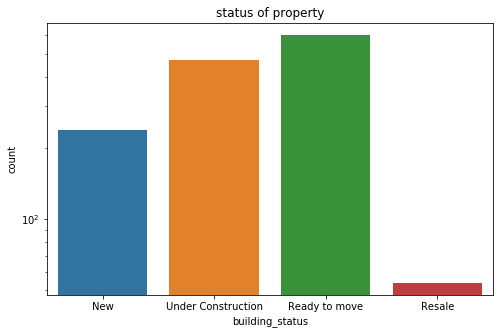

In [248]:
b_status(t)

### Observations:
- Compared to others Ready to move are more in this price range.
- resale to be lowest less than 100.

# 7.6 Agent_rating

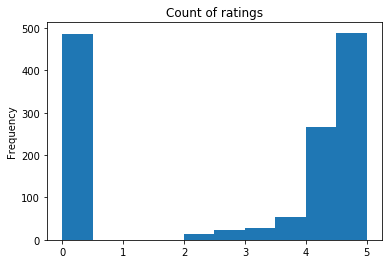

In [353]:
rating(t)

### Observations:
- There are almost 480 agents who has 4.5 to  5.0 ratings and least number of agents have ratings between 2 and 3.
- 480 agents have their ratings between 0 and 0.5

# 8th Interval  [70 to 80L]

In [7]:
u=df[(df['price(L)']>70.00)&(df['price(L)']<=80.00)]
u.shape

(1405, 7)

### Observations:
- for the considered interval there are only 1405 datapoints i.e, 1405 properties.

# 8.1 Title

In [8]:
u1=u['title'].value_counts()
u1

3 BHK Apartment             670
2 BHK Apartment             242
Residential Plot            224
2 BHK Independent House      84
3 BHK Villa                  77
3 BHK Independent House      19
4 BHK Independent House      17
1 BHK Independent House      15
1 BHK Apartment              12
2 BHK Villa                  10
3 BHK Independent Floor       7
4 BHK Apartment               7
6 BHK Independent House       7
4 BHK Villa                   5
2 BHK Independent Floor       2
4 BHK Independent Floor       2
1 BHK Villa                   2
5 BHK Independent House       1
10 BHK Independent House      1
9 BHK Apartment               1
Name: title, dtype: int64

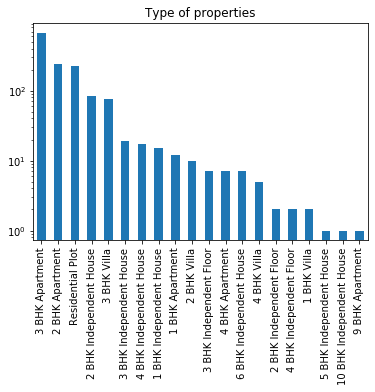

In [11]:
title(u1)

### Observations:
- There are 200 Residentail plots, 200 3BHK apartments, 190 2BHK apartments, 2 1BHK villa, 90 3BHK Villa.

# 8.2 Location

In [254]:
u2=u['location'].value_counts()
u2

Tellapur                          263
Gachibowli                        123
Kukatpally                         66
Kondapur                           56
Miyapur                            35
Kokapet                            33
Narsingi                           33
Serilingampally                    32
Nanakramguda                       31
Manikonda                          27
Shamshabad                         27
Maheshwaram                        24
Madinaguda                         20
Boduppal                           17
Medchal                            17
Mokila                             16
Bandlaguda Jagir                   12
Patancheru                         12
Mansanpally Highway                12
Beeramguda                         12
Nallagandla Gachibowli             12
financial District                 11
Mallampet                          10
Attapur                            10
Puppalaguda                        10
Balanagar                           9
Kollur      

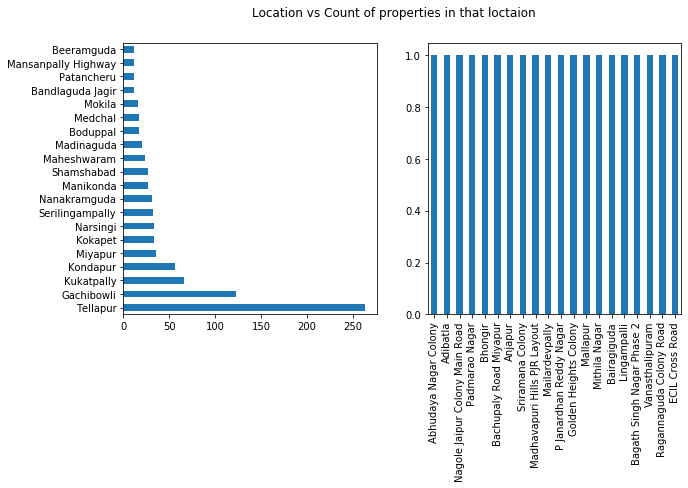

In [255]:
location(u2)

In [256]:
len((u['location'].value_counts())==1)

248

### Observations:
- Highest number of properties in the considered price interval comes from Tellapur i.e,around 260 and followed by Gachibowli i.e,120 and follows.
- There 248 locations which has only one property.

# 8.3 Price (L)

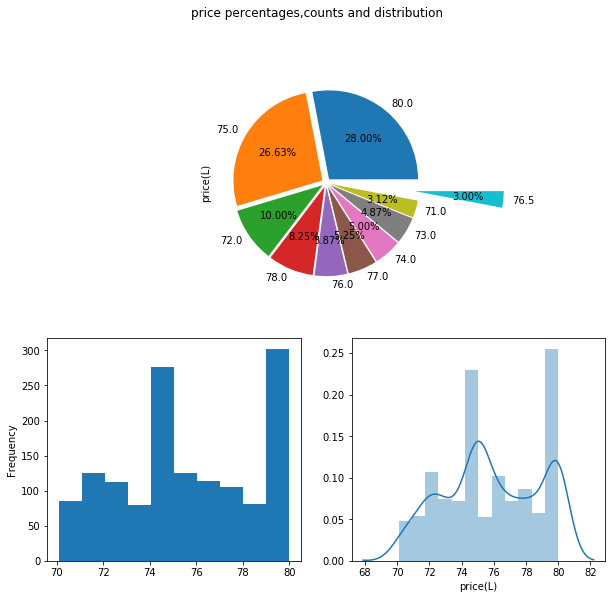

In [257]:
price(u)

### Observations:
- Approximately 28% of properties in this price range have price as 80 L.
- 26.63% of properties have price as 75 L.
- 3.00% of properties have price as 76.5 L.
- Number of properties having price (79-80L) are more Compared to (74 to 75 L).

# 8.4 Rate_persqft & Area_insqft

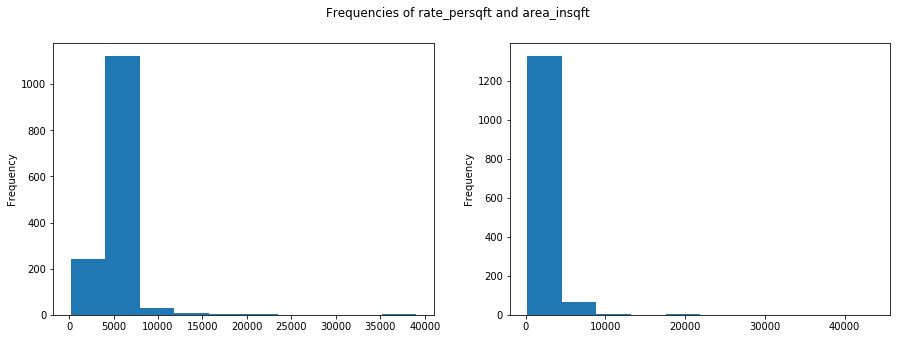

In [258]:
area_rate(u)

### Observations:
- 1100 properties in 70 to 80L range have rate_persqft price between 4900 to 7500.
- Area of properties are mostly around 150 to 5000 i.e,almost 1300 properties

# 8.5 Building status

In [259]:
u['building_status'].value_counts()

Under Construction    654
Ready to move         527
New                   171
Resale                 53
Name: building_status, dtype: int64

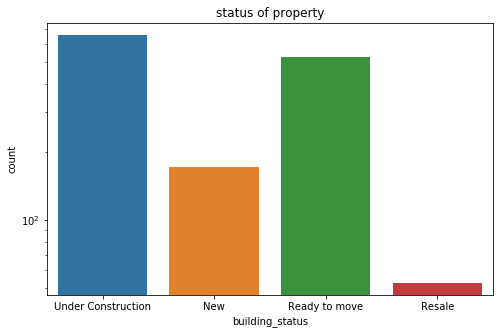

In [261]:
b_status(u)

### Observations:
- Compared to others Under Construction are more in 70 to 80 L price range.
- Resale to be lowest less than 100.

# 8.6 Agent_rating

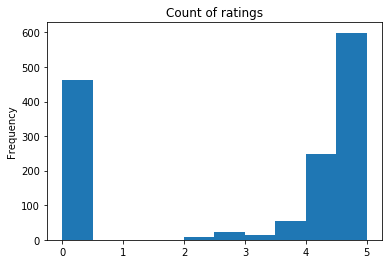

In [354]:
rating(u)

### Observations:
- There are almost 600 agents who has 4.5 to 5.0 ratings and least number of agents have ratings between 2 and 3.
- 450 agents have their ratings between 0 and 0.5

# 9th Interval  [80 to 90L]

In [264]:
z=df[(df['price(L)']>80.00)&(df['price(L)']<=90.00)]
z.shape

(1266, 7)

### Observations:
- for the considered interval there are only 1266 datapoints i.e, 1266 properties.

# 9.1 Title

In [265]:
z1=z['title'].value_counts()
z1

3 BHK Apartment            688
2 BHK Apartment            172
Residential Plot           171
3 BHK Villa                 85
3 BHK Independent House     56
2 BHK Independent House     37
4 BHK Independent House     11
1 BHK Independent House      9
4 BHK Villa                  6
1 BHK Apartment              6
2 BHK Villa                  5
4 BHK Apartment              4
6 BHK Independent House      3
3 BHK Independent Floor      3
6 BHK Independent Floor      2
5 BHK Independent House      2
2 BHK Independent Floor      2
1 BHK Villa                  1
4 BHK Independent Floor      1
1 BHK Independent Floor      1
7 BHK Independent House      1
Name: title, dtype: int64

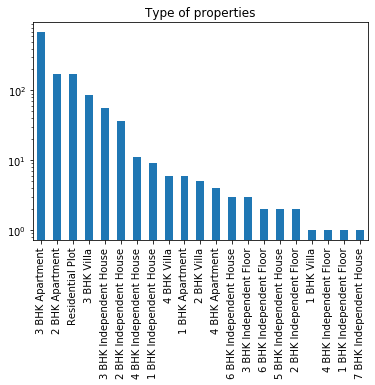

In [269]:
title(z1)

### Observations:
- There are almost 170 Residentail plots, 600 3BHK apartments, 170 2BHK apartments, 5 1BHK apartments, 5 4BHK Villa.

# 9.2 Location

In [270]:
z2=z['location'].value_counts()
z2

Tellapur                        255
Gachibowli                      197
Kukatpally                       79
Kondapur                         41
Mallampet                        41
Kokapet                          39
Nanakramguda                     38
Narsingi                         30
Maheshwaram                      28
Bachupally                       26
Manikonda                        25
Shamshabad                       24
Nallagandla Gachibowli           18
International Airport            13
Mansanpally Highway              12
Serilingampally                  12
Hitech City                      10
Mallampet Road                   10
Shaikpet                          9
Sainikpuri                        9
Bandlaguda Jagir                  9
Kompally                          7
Beeramguda                        7
Alwal                             7
Nizampet                          6
Puppalaguda                       6
Nallagandla Road                  6
Patancheru                  

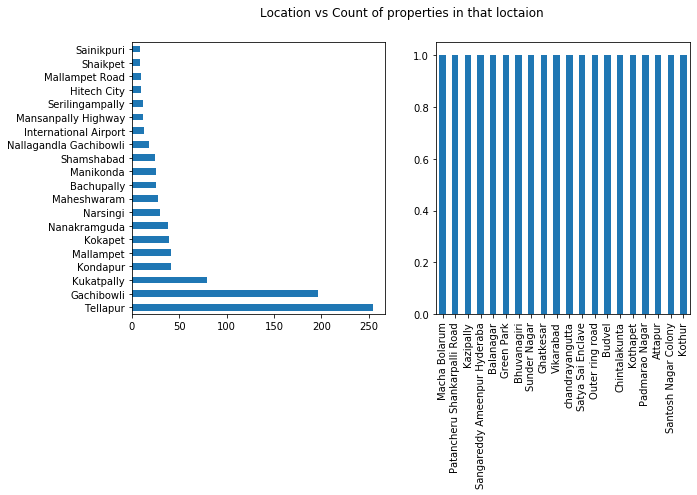

In [271]:
location(z2)

In [272]:
len((z['location'].value_counts())==1)

192

### Observations:
- Highest number of properties in the considered price interval comes from Tellapur i.e,around 260 and next gachibowli i.e,190 and follows.
- There 192 locations which has only one property.

# 9.3 Price (L)

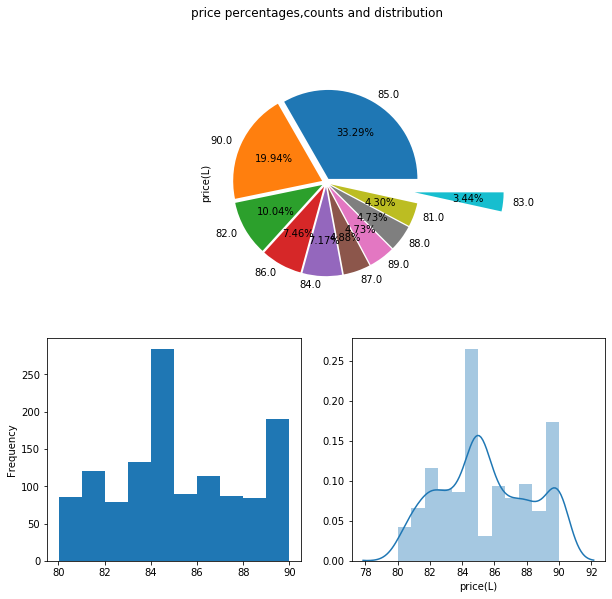

In [273]:
price(z)

In [ ]:
### Observations:
- Approximately 33.29% of properties in this price range have price as 85 L.
- 19.94% of properties have price as 90 L.
- 3.44% of properties have price as 83 L.
- Number of properties having price (84-85L) are more Compared to rest of the prices.

# 9.4 Rate_persqft & Area_insqft

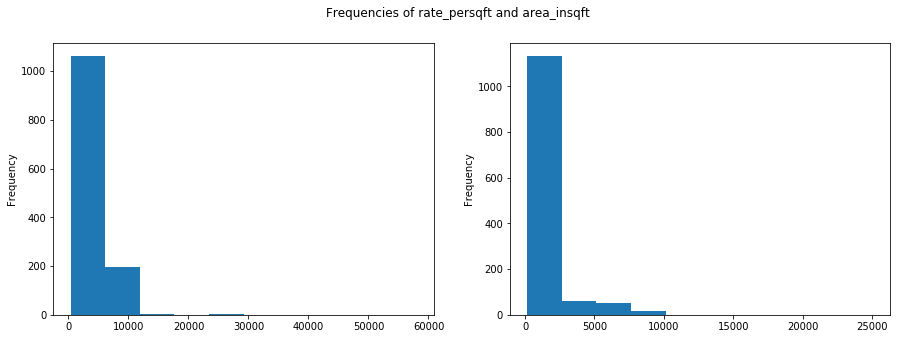

In [274]:
area_rate(z)

### Observations:
- 1100 properties in 80-90 L range have rate_persqft price between 100 to 5000.
- Area of properties are mostly around 100 to 1500 i.e,almost 1100 properties

# 9.5 Building Status

In [275]:
z['building_status'].value_counts()

Under Construction    674
Ready to move         421
New                   125
Resale                 46
Name: building_status, dtype: int64

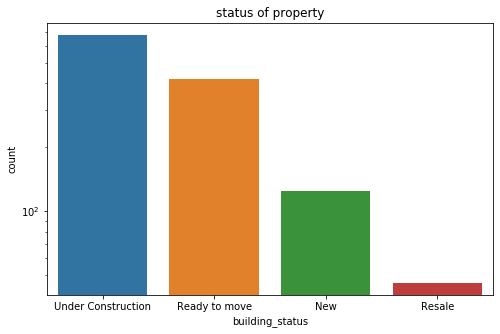

In [276]:
b_status(z)

### Observations:
- Compared to others Under Construction are more in 80 to 90 L price range.
- Resale properties are less than 100 .

# 9.6 Agent_rating

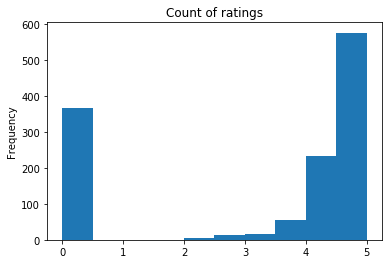

In [355]:
rating(z)

### Observations:
- There are almost 550 agents who has 4.5 to 5.0 ratings and least number of agents have ratings between 2 and 2.5.
- 350 agents have their ratings between 0 and 0.5

# 10th Interval  [90 to 100L]

In [16]:
s=df[(df['price(L)']>90.00)&(df['price(L)']<=100.00)]
s.shape

(739, 7)

### Observations:
- for the considered interval there are only 739 datapoints i.e, 739 properties.

# 10.1 Title

In [279]:
s1=s['title'].value_counts()
s1

3 BHK Apartment             402
Residential Plot            119
2 BHK Apartment              71
3 BHK Villa                  49
2 BHK Independent House      24
3 BHK Independent House      19
4 BHK Independent House      17
4 BHK Apartment              10
5 BHK Independent House       6
2 BHK Villa                   6
1 BHK Apartment               4
1 BHK Independent House       3
3 BHK Independent Floor       3
4 BHK Villa                   2
6 BHK Apartment               1
6 BHK Independent House       1
7 BHK Independent House       1
10 BHK Independent House      1
Name: title, dtype: int64

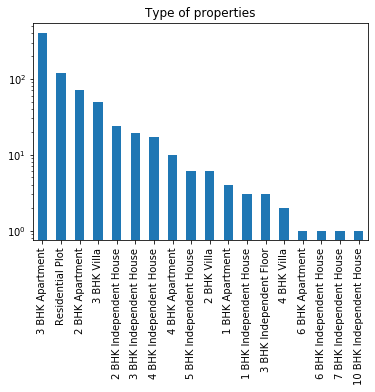

In [280]:
title(s1)

### Observations:
- There are almost 100 Residentail plots, 400 3BHK apartments, 71 2BHK apartments, 4 1BHK apartments, 40 3BHK Villa.

# 10.2 Location

In [17]:
s2=s['location'].value_counts()
s2

Tellapur                             125
Gachibowli                            76
Kukatpally                            52
Nanakramguda                          46
Kondapur                              38
Kokapet                               19
Maheshwaram                           18
Manikonda                             16
Shamshabad                            14
Kapra                                 14
Narsingi                              13
Hitech City                           12
Miyapur                               10
Nallagandla Gachibowli                 9
Sanath Nagar                           7
Serilingampally                        7
Madhapur                               6
Bachupally                             6
Chengicherla                           6
Mallampet                              6
Uppal                                  5
Banjara Hills                          5
International Airport                  5
Mansanpally Highway                    5
Chaitanyapuri   

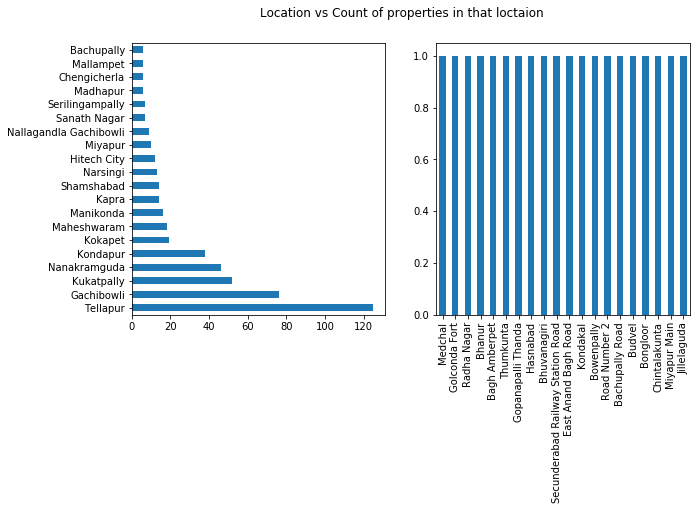

In [283]:
location(s2)

In [284]:
len((s['location'].value_counts())==1)

155

### Observations:
- Highest number of properties in the considered price interval comes from Tellapur i.e,around 130 and next Gachibowli i.e, 70 and follows.
- There 155 locations which has only one property.

# 10.3 Price (L)

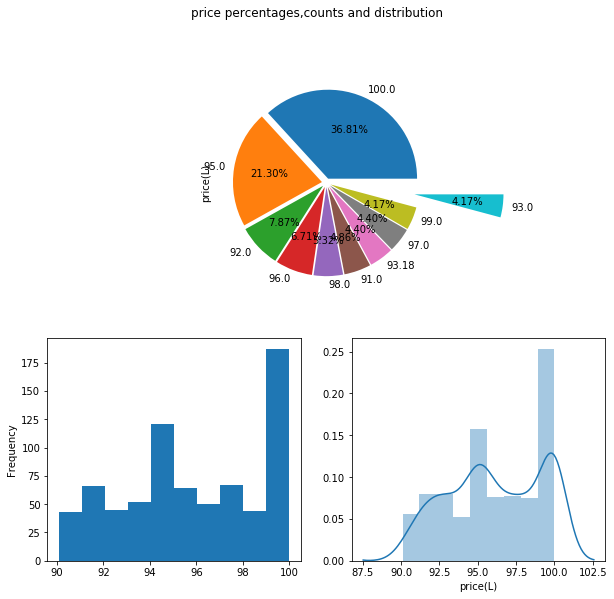

In [285]:
price(s)

### Observations:
- Approximately 36.81% of properties in this price range have price as 100 L.
- 21.30% of properties have price as 95.0 L.
- 4.17% of properties have price as 93 and 99 L.
- Number of properties having price (99-100 L) are more Compared to (94 to 95 L).

# 10.4 Rate_persqft & Area_insqft

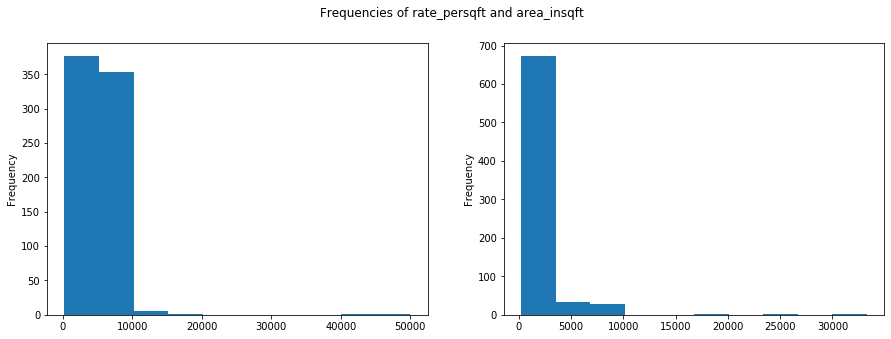

In [286]:
area_rate(s)

### Observations:
- 375 properties in 90 to 100L range have rate_persqft price between 100 to 9000.
- Area of properties are mostly around 100 to 4000 i.e,almost 680 properties

# 10.5 Building status

In [287]:
s['building_status'].value_counts()

Under Construction    316
Ready to move         304
New                    86
Resale                 33
Name: building_status, dtype: int64

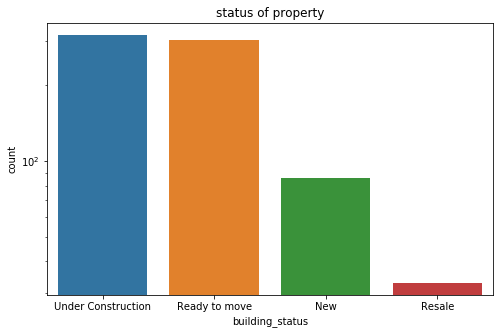

In [289]:
b_status(s)

### Observations:
- Both under construction and ready to move properties have almost equal number of properties,where resale kind of properties are very less.

# 10.6 Agent_rating

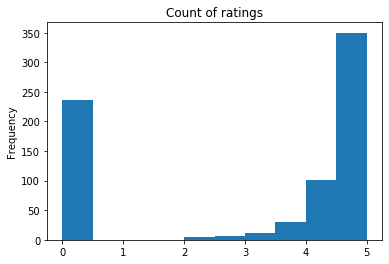

In [18]:
rating(s)

### Observations:
- There are almost 350 agents who has 4.5 to 5.0 ratings and least number of agents have ratings between 2 and 3.
- 250-280 agents have their ratings between 0 and 0.5

# 11th Interval [100 to 7000L]

In [21]:
n=df[(df['price(L)']>100.00)&(df['price(L)']<=7000.00)]
n.shape

(3783, 7)

### Observations:
- for the considered interval there are 3783 datapoints i.e, 3783 properties.

# 11.1 Title

In [293]:
n1=n['title'].value_counts()
n1

3 BHK Apartment             1389
Residential Plot             804
4 BHK Villa                  396
4 BHK Apartment              348
3 BHK Villa                  198
4 BHK Independent House      105
3 BHK Independent House       87
2 BHK Independent House       76
2 BHK Apartment               54
5 BHK Apartment               53
5 BHK Villa                   52
5 BHK Independent House       37
6 BHK Independent House       33
2 BHK Villa                   20
7 BHK Independent House       18
3 BHK Independent Floor       16
1 BHK Independent House       15
10 BHK Independent House      12
4 BHK Independent Floor       11
6 BHK Apartment                8
9 BHK Independent House        7
8 BHK Independent House        6
1 BHK Apartment                5
6 BHK Villa                    4
6 BHK Independent Floor        3
2 BHK Independent Floor        3
9 BHK Independent Floor        2
10 BHK Apartment               2
5 BHK Penthouse                2
7 BHK Villa                    2
12 BHK Ind

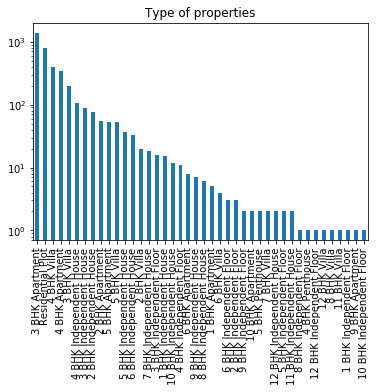

In [304]:
title(n1)

### Observations:
- There are almost 800 Residentail plots, 1200 3BHK apartments, 350 4BHK villa, 300 4BHK apartments, 1 11BHK villa.

# 11.2 Location

In [296]:
n2=n['location'].value_counts()
n2

Gachibowli                             360
Tellapur                               305
Kukatpally                             220
Nanakramguda                           181
Kondapur                               174
Hitech City                            147
Narsingi                                99
Banjara Hills                           99
Maheshwaram                             93
Shaikpet                                90
Kokapet                                 89
Serilingampally                         75
Thummaluru                              73
Manikonda                               67
Bachupally                              56
Mokila                                  51
Shamshabad                              48
financial District                      46
Bandlaguda Jagir                        40
Madhapur                                39
Jubilee Hills                           36
Tukkuguda                               36
Nallagandla Gachibowli                  32
Miyapur    

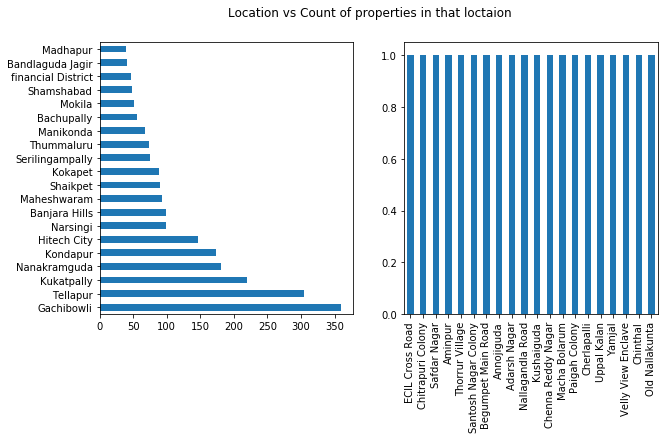

In [305]:
location(n2)

In [306]:
len((n['location'].value_counts())==1)

423

### Observations:
- Highest number of properties in the considered price interval comes from Gachibowli i.e,360 and followed by Tellapur i.e,300 and follows.
- There 423 locations which has only one property.

# 11.3 Price (L)

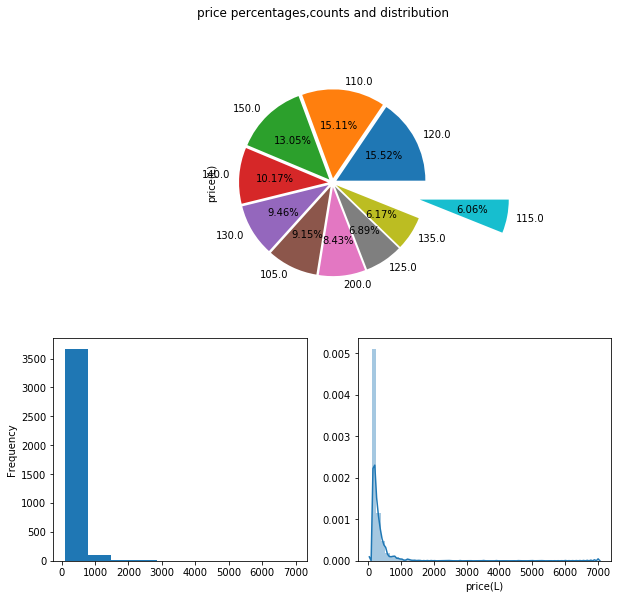

In [298]:
price(n)

### Observations:
- Approximately 15.52% of properties in the price range 100 to 7000 L have price as 120 L.
- 6.06% of properties have price as 115 L.
- Number of properties having price (100-800L) are almost 3600.

# 11.4 Rate_persqft & Area_insqft

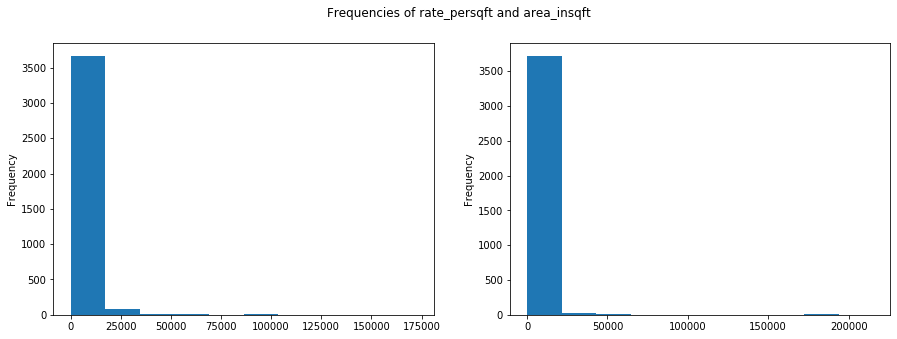

In [300]:
area_rate(n)

### Observations:
- 3600 properties have rate_persqft price between 100 to 20,000.
- Area of properties are mostly around 150 to 25000 i.e,almost 3700 properties

# 11.5 Building status

In [301]:
n['building_status'].value_counts()

Ready to move         1631
Under Construction    1348
New                    493
Resale                 311
Name: building_status, dtype: int64

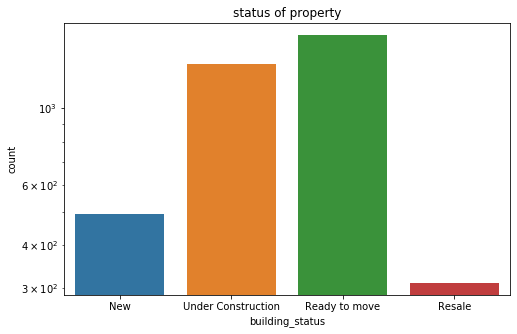

In [302]:
b_status(n)

### Observations:
- Compared to others Ready to move are more.And resale properties are least compared to others.

# 11.6 Agent_rating

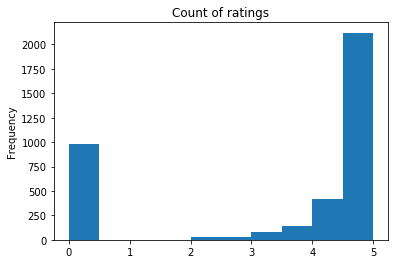

In [356]:
rating(n)

### Observations:
- There are almost 2100 agents who has 4.5 to 5.0 ratings and least number of agents have ratings between 2 and 3.
- 900 agents have their ratings between 0 and 0.5